#**Explainable AI**
Expainable AI (XAI) is a set of tools and frameworks to help you understand and interpret predictions made by your machine learning model. With it, you can debug and imporve your model performance, and help others understand your model's behavior. More complex the model you build the more difficult it is  to explain the black box from that model to the user, that's why we need XAI. In this section, I will show you how the explainable AI using:
- SHAP (Shapley Additive Explanations)
- LIME (Local Interpretable Model-Agnostic Explanations)

In [1]:
#install shap library
!pip install shap

In [2]:
!pip install model_evaluation_utils 

ERROR: Could not find a version that satisfies the requirement model_evaluation_utils (from versions: none)
ERROR: No matching distribution found for model_evaluation_utils


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import shap
#load js visualization, without this the SHAP'splot won't be displayed
shap.initjs()

"""
ref : https://github.com/dphi-official/Machine_Learning_Bootcamp/blob/master/SHAP.ipynb
full : https://github.com/dphi-official/Machine_Learning_Bootcamp/tree/master/Explainable_A.I_Essentials

what-if tools, you can find it on ai-platform
https://www.youtube.com/watch?v=qTUUwfG1vSs
https://pair-code.github.io/what-if-tool/demos/uci.html

Azure 
https://docs.microsoft.com/en-us/azure/machine-learning/how-to-machine-learning-interpretability-aml
"""

'\nref : https://github.com/dphi-official/Machine_Learning_Bootcamp/blob/master/SHAP.ipynb\nfull : https://github.com/dphi-official/Machine_Learning_Bootcamp/tree/master/Explainable_A.I_Essentials\n\nwhat-if tools, you can find it on ai-platform\nhttps://www.youtube.com/watch?v=qTUUwfG1vSs\nhttps://pair-code.github.io/what-if-tool/demos/uci.html\n\nAzure \nhttps://docs.microsoft.com/en-us/azure/machine-learning/how-to-machine-learning-interpretability-aml\n'

##**Load the dataset**

In [4]:
#getting the data and labels from the dataset
data, labels = shap.datasets.adult(display=True)

#backup data
data2, _ = shap.datasets.adult(display=True)

#storing the labels as an numpy array (label's value is true/false)
labels = np.array([int(label) for label in labels])

print(data.shape, labels.shape)
data.head()

(32561, 12) (32561,)


Age          Workclass  ...  Hours per week         Country
0  39.0          State-gov  ...            40.0   United-States
1  50.0   Self-emp-not-inc  ...            13.0   United-States
2  38.0            Private  ...            40.0   United-States
3  53.0            Private  ...            40.0   United-States
4  28.0            Private  ...            40.0            Cuba

[5 rows x 12 columns]

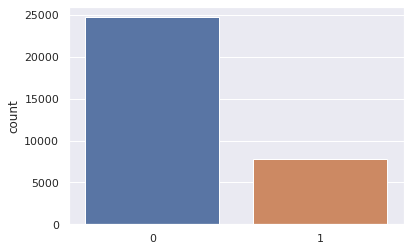

In [5]:
sns.countplot(labels)
plt.show()

##**Preprocessing**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  float32 
 1   Workclass       32561 non-null  category
 2   Education-Num   32561 non-null  float32 
 3   Marital Status  32561 non-null  category
 4   Occupation      32561 non-null  category
 5   Relationship    32561 non-null  category
 6   Race            32561 non-null  category
 7   Sex             32561 non-null  category
 8   Capital Gain    32561 non-null  float32 
 9   Capital Loss    32561 non-null  float32 
 10  Hours per week  32561 non-null  float32 
 11  Country         32561 non-null  category
dtypes: category(7), float32(5)
memory usage: 862.2 KB


**Encoding**

In [7]:
cat_cols = data.select_dtypes('category').columns
cat_cols

Index(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [8]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)
data.head()

Age  Workclass  Education-Num  ...  Capital Loss  Hours per week  Country
0  39.0          7           13.0  ...           0.0            40.0       39
1  50.0          6           13.0  ...           0.0            13.0       39
2  38.0          4            9.0  ...           0.0            40.0       39
3  53.0          4            7.0  ...           0.0            40.0       39
4  28.0          4           13.0  ...           0.0            40.0        5

[5 rows x 12 columns]

**Split the dataset**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=1)

**Original Dataset (wihtout encode)**

In [10]:
data_ori, label_ori = shap.datasets.adult(display=True)
x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(data_ori, label_ori, test_size=0.25, random_state=1)

##**Build Model**

In [11]:
model = XGBClassifier(n_estimators=500, max_depth=5, random_state=42)
model.fit(x_train, y_train)

print("Accuracy Score XGB: ", accuracy_score(model.predict(x_test), y_test))

Accuracy Score XGB:  0.8792531630020882


##**Explain prediction with SHAP**

###**Build Tree SHAP for XGB to explain the model**

In [12]:
#create tree explainer for the model
explainer = shap.TreeExplainer(model)

#find out the shap value 
shap_value = explainer.shap_values(x_test)

#expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected value: ', explainer.expected_value)

pd.DataFrame(shap_value, columns=x_train.columns).head()

Expected value:  -1.3421695


Age  Workclass  Education-Num  ...  Capital Loss  Hours per week   Country
0 -0.051376   0.111487      -0.545159  ...     -0.044080        0.818185 -0.004907
1 -2.792532  -0.012315      -0.727880  ...     -0.055326       -1.565443 -0.022264
2 -0.645116   0.267397       0.473906  ...     -0.036648        0.302565  0.011135
3 -0.167641   0.032170      -0.401622  ...     -0.062346       -0.021623  0.012263
4 -0.014887  -0.002766      -0.994077  ...     -0.038924       -0.164238 -0.005660

[5 rows x 12 columns]



This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).
<br><br>
Also, the Expected Value: -1.3625857 being displayed above will be used as the **<i>base value</i>** throughout all the visualizations below. The values above this base value will be put into class 1 (income exceeds 50K/yr) wheras the values below it will be put into class 0 (income doesn't exceed 50K/yr).


###**Try to predict whether someone salary  is < 50K or >50K using SHAP - Force Plots**
Force plots have been the default method for visualizing individual model predictions via the shap package.

In [13]:
#check the first data
y_test_ori[0] #false mean less then 50K

False

In [14]:
#Now, we'll plot a Force plot to see what features push his income lower than $50k.
shap.initjs()
# shap_value[0,:] : slice the first data from shape_values
# x_test_ori.iloc[0,:] : slice the first data from data without preprocesssing to give the label info
shap.force_plot(explainer.expected_value, shap_value[0,:], x_test_ori.iloc[0,:])

- Features pushing the prediction higher are shown in red, while pushing the prediction lower are in blue.
- We can see most of the features are displayed in blue i.e all features contributed in making the income lower than the 50k dollars.
- Final result: we know that our base value is -1.324 and explainer expected value is -2.67. So the conclusion is the final result much lower than the base value. That's why our model predict this salary **data categorize to lower than 50K.**

**Another example**

In [15]:
y_test_ori[2]

True

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_value[2,:], x_test_ori.iloc[2,:])

###**Visualizing and Explaining Multiple Predictions**

In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_value[:500,:], x_test.iloc[:500,:])

The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can hover over the graph to understand the following observations:
- Most of the first 20 test samples probably earn more than 50K and they are married or\and have a good capital gain or\and have a higher education level!
- Most of the next 210+ test samples probably earn less than or equal to 50K and they are mostly un-married and\or are very young in age or divorced!
-etc

###**Feature Importance with SHAP**

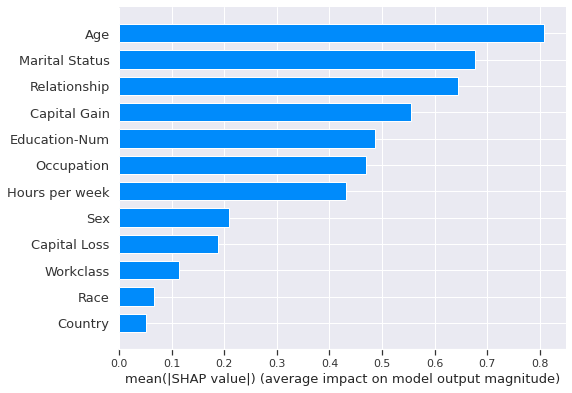

In [18]:
shap.initjs()
shap.summary_plot(shap_value, x_test, plot_type="bar")

- From the above simple bar chart, we observe that Age, Marital Status, Relationship and Capital Gain Features are the top 4 important features while determining the income.

- On the other hand, Country, Race and Workclass are the least important features while determining the income.


###**SHAP Summary Plot**
SHAP also enables us to use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset.

- Features are sorted by the sum of the SHAP value magnitudes across all samples.
- Note: when the scatter points don’t fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.


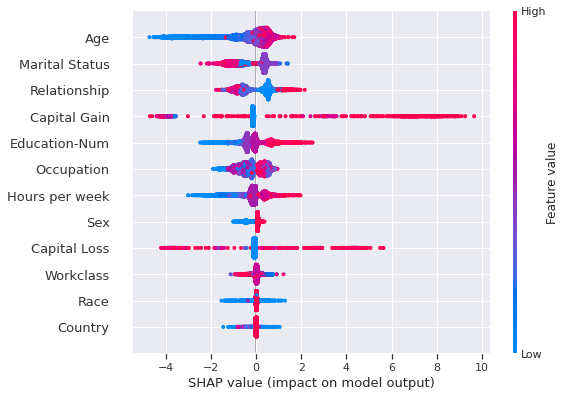

In [19]:
shap.initjs()
shap.summary_plot(shap_value, x_test)

- It is interesting to note that the age, marital status and relationship feature have more total model impact than the capital gain feature. (Since they lie on the top and the Feature Value bar indicates high there).
- But, for those samples where capital gain matters, it has more impact than age or marital status. (Since its SHAP value is the highest amongst all).
- In other words, capital gain affects a few predictions by a large amount, while age or marital status affects all predictions by a smaller amount.

###**Shape Dependence Plot**
- SHAP dependence plots show the effect of a single (or two) feature across the whole dataset.
- They plot a feature’s value vs the SHAP value of that feature across many samples.
- The attributes of the Dependence Plot can be understood as follows:
  - ind = index of the feature we want to plot or the feature name
  - interaction_index = used to explicitly set which feature gets used for coloring
  - shap_values = matrix of SHAP values that we generated earlier
  - features = The data to be used for generating the dependence plot



<b>PDP of Age feature effects model predictions</b>

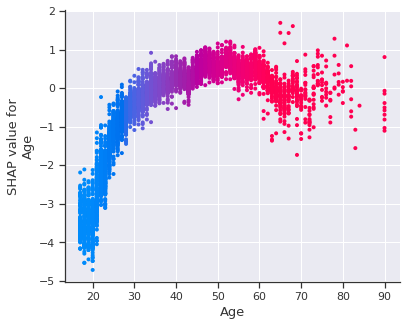

In [20]:
shap.initjs()
shap.dependence_plot(ind='Age', interaction_index='Age',
                     shap_values=shap_value, 
                     features=x_test)

Just like we observed before. the middle-aged people have a slightly higher shap value, pushing the model’s prediction decisions to say that these individuals make more money as compared to younger or older people


<b>PDP of Education_Num</b>

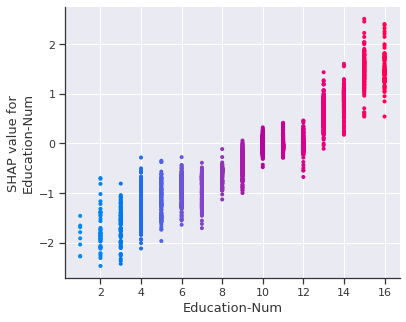

In [21]:
shap.initjs()
shap.dependence_plot(ind='Education-Num', interaction_index='Education-Num',
                     shap_values=shap_value, 
                     features=x_test)

Higher education levels have higher shap values, pushing the model’s prediction decisions to say that these individuals make more money as compared to people with lower education levels.

<b>Two-way PDP showing interactions between features ‘Age’ and ‘Capital Gain’</b>

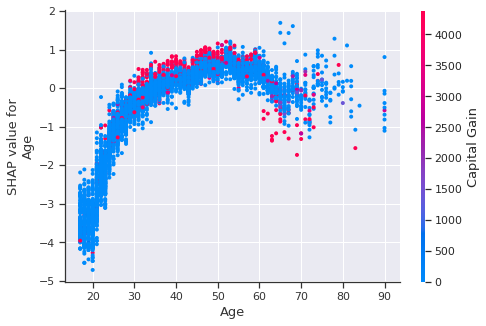

In [22]:
shap.initjs()
shap.dependence_plot(ind='Age', interaction_index='Capital Gain', 
                     shap_values = shap_value, features = x_test, 
                     display_features=x_test_ori)

Interesting to see higher the "capital gain" and the middle-aged folks (30–50) having the highest chance of making more money!


<b>Two-way PDP showing interactions between features ‘Age’ and ‘Hours per week’ </b>

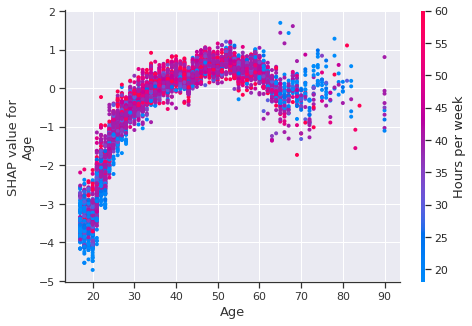

In [23]:
shap.initjs()
shap.dependence_plot(ind='Age', interaction_index='Hours per week', 
                     shap_values=shap_value, features=x_test)

Nothing extra-ordinary here, middle-aged people working the most make the most money!

<b>Two-way PDP showing interactions between features ‘Education-Num’ and ‘Relationship’</b>

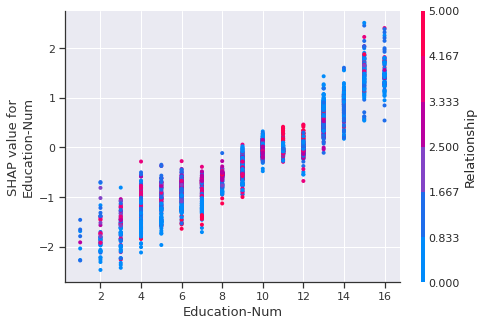

In [24]:
shap.initjs()
shap.dependence_plot(ind='Education-Num', interaction_index='Relationship', 
                     shap_values=shap_value, features=x_test)

This is interesting because both the features are similar in some context, we can see typically educated and married people with relationship status of either husband(shown by light blue) or wife(shown by red) having the highest chance of making more money!


##**Skater and LIME**

In [25]:
data2.head()

Age          Workclass  ...  Hours per week         Country
0  39.0          State-gov  ...            40.0   United-States
1  50.0   Self-emp-not-inc  ...            13.0   United-States
2  38.0            Private  ...            40.0   United-States
3  53.0            Private  ...            40.0   United-States
4  28.0            Private  ...            40.0            Cuba

[5 rows x 12 columns]

**One hot encoding**

In [26]:
data2 = pd.get_dummies(data2)
data2.head()

Age  Education-Num  ...  Country_ Vietnam  Country_ Yugoslavia
0  39.0           13.0  ...                 0                    0
1  50.0           13.0  ...                 0                    0
2  38.0            9.0  ...                 0                    0
3  53.0            7.0  ...                 0                    0
4  28.0           13.0  ...                 0                    0

[5 rows x 91 columns]

**Split the datase**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data2, labels, test_size=0.25, random_state=1)

**Build Boosting Classifer Model**

In [28]:
model_xgb = XGBClassifier(n_estimators=500, max_depth=10, base_score=0.5,
                        objective='binary:logistic', random_state=42)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Evaluation**

Model Accuracy		: 87.3%
F1 Score Accuracy	: 70.77%



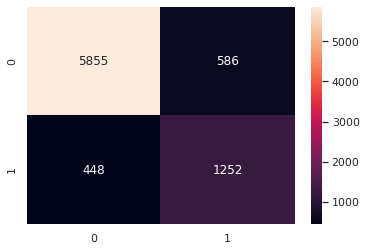

In [29]:
y_pred = model_xgb.predict(x_test)

print("Model Accuracy\t\t: {0}%".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("F1 Score Accuracy\t: {0}%".format(round(f1_score(y_test,y_pred)*100,2)))
print()
sns.heatmap(confusion_matrix(y_pred,y_test), annot =True, fmt = '');

###**LIME**

In [42]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

xgc_np = XGBClassifier(n_estimators=500, max_depth=10, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(x_train.values, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
exp = LimeTabularExplainer(x_test.values, feature_names=list(x_train.columns), 
                           discretize_continuous=True, 
                           class_names=['$50K or less', 'More than $50K'])

In [47]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', y_pred[doc_num])
exp.explain_instance(x_test.iloc[doc_num].values, 
                     xgc_np.predict_proba, 
                     num_samples=50000).show_in_notebook()

Actual Label: 0
Predicted Label: 0


In [50]:
doc_num = 2
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', y_pred[doc_num])
exp.explain_instance(x_test.iloc[doc_num].values, 
                     xgc_np.predict_proba,
                     num_samples=50000).show_in_notebook()

Actual Label: 1
Predicted Label: 1
